<font color='red' size=4>损失函数</font>    
$$ J\left( \boldsymbol{\hat{\beta}}  \right) = \frac{1}{2m} \left( \mathbf{y} - X \boldsymbol{\hat{\beta}} \right)^T \left(\mathbf{y} - X \boldsymbol{\hat{\beta}} \right) + \alpha ||\hat{\beta}||_1 $$    
&emsp;&emsp;Lasso回归与岭回归的不同之处在于罚项中使用了绝对值而非平方和的形式,这将导致在模型的参数估计过程中有些系数会因为罚项的存在而直接减少
到0.随着惩罚力度的增加,越来越多的系数会缩小并最终归结为0,这意味着在模型构建的同时我们也对给定的多个变量进行了变量选择.  

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [48]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 2 * x**3 + 3*x**2 + 2*x + np.random.normal(0, 5, size=100)

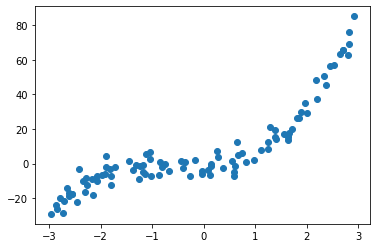

In [49]:
plt.scatter(x, y)
plt.show()

In [50]:
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y) # 留出法划分数据集

In [51]:
def PolynomialRegression(degree):
    """多项式回归"""
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()) 
    ])

In [52]:
poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

4198.5027167123235

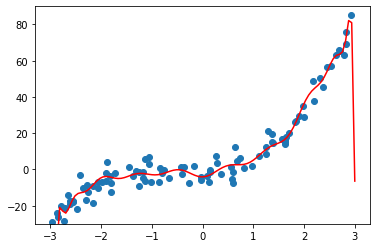

In [53]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.ylim(-30, 90)
    plt.show()

In [ ]:
plot_model(poly_reg) # 过拟合(多项式回归)

In [54]:
'''
max_iter : int, default=1000
        The maximum number of iterations.
'''
def LassoRegression(degree, alpha):
    """Lasso回归"""
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha, max_iter=1000))
    ])

In [55]:
lasso1_reg = LassoRegression(20, 0.01) # alpha=0.01
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

C:\Users\dcgo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.49752011027067, tolerance: 4.192847627951369
  positive)


34.89974532724262

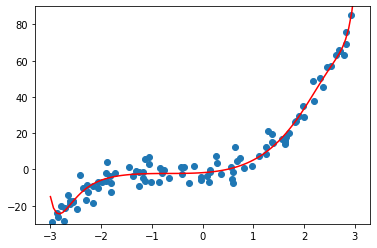

In [56]:
plot_model(lasso1_reg)

In [57]:
lasso2_reg = LassoRegression(20, 0.1) # alpha=0.1
lasso2_reg.fit(X_train, y_train)

y2_predict = lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

27.976607520937954

In [58]:
lasso1_reg[2].coef_ # Lasson回归项的系数(一部分系数为0)

array([ 0.        ,  3.18519786,  7.55675303, 17.42818454,  6.66716661,
        3.74390202,  0.        ,  0.        , -2.78513586, -0.        ,
       -6.97904789, -3.72594558, -0.82034936, -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  1.22997313,
        5.20966749])

In [59]:
lasso2_reg[2].intercept_ # Lasson回归截距项

6.8665173684644305

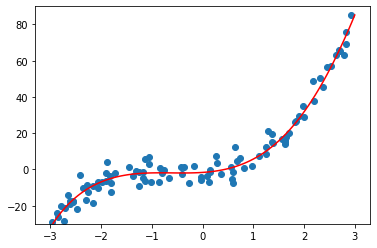

In [60]:
plot_model(lasso2_reg) # 较好的拟合了测试数据集

In [61]:
lasso3_reg = LassoRegression(20, 1) # alpha=1
lasso3_reg.fit(X_train, y_train)

y3_predict = lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

29.091722158321865

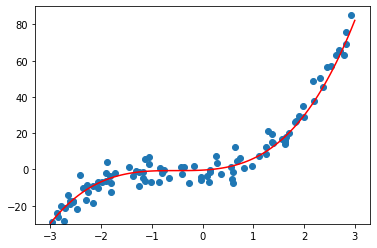

In [62]:
plot_model(lasso3_reg)

In [83]:
lasso4_reg = LassoRegression(20, 10) # alpha=10
lasso4_reg.fit(X_train, y_train)

y4_predict = lasso4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

211.1462498429707

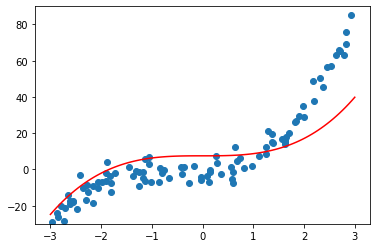

In [84]:
plot_model(lasso4_reg) # 欠拟合(alpha过大)

In [85]:
lasso4_reg[2].coef_ # 此时大部分系数为0

array([ 0.        ,  0.        ,  0.        , 11.57838364,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])